In [1]:
import pandas as pd

file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/April-July2021_Sunda.csv"

# Membaca file CSV ke dalam DataFrame
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris
print("Jumlah baris data:", jumlah_baris)

Jumlah baris data: 7768690


In [2]:
print("Daftar kolom:")
print(data_frame.columns)

Daftar kolom:
Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name\', 'dt_date time1',
       'dt_date time2'],
      dtype='object')


In [3]:
# Konversi kolom dt_date.time1 menjadi tipe datetime
data_frame['dt_date.time1'] = pd.to_datetime(data_frame['dt_date time1'])

In [4]:
# Filter berdasarkan tanggal
start_date = pd.to_datetime('2021-05-01')
end_date = pd.to_datetime('2021-05-30')
filtered_data1 = data_frame[(data_frame['dt_date.time1'] >= start_date) & (data_frame['dt_date.time1'] <= end_date)]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8644\3244211382.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


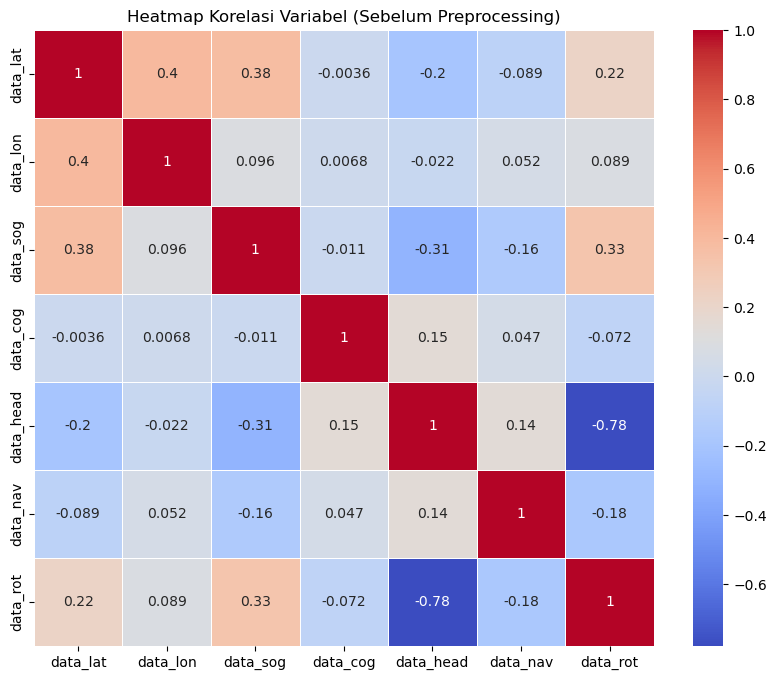

In [7]:
# Memilih hanya kolom-kolom yang akan digunakan
selected_columns = ['data_lat', 'data_lon', 'data_sog', 'data_cog', 'data_head', 'data_nav', 'data_rot', 'dt_date time1']
selected_data = filtered_data1[selected_columns]

# Menghitung matriks korelasi antara variabel-variabel terpilih
correlation_matrix = selected_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))  # Ukuran plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Heatmap Korelasi Variabel (Sebelum Preprocessing)")
plt.show()

In [8]:
# Memilih hanya kolom-kolom yang akan digunakan
selected_columns = ['data_lat', 'data_lon', 'data_sog', 'data_cog', 'data_head', 'data_nav', 'data_rot']
selected_data = filtered_data1[selected_columns]

# Menghitung matriks korelasi antara variabel-variabel terpilih
correlation_matrix = selected_data.corr()

# Menampilkan tabel korelasi
print("Tabel Korelasi Variabel (Sebelum Preprocessing):\n")
print(correlation_matrix)

Tabel Korelasi Variabel (Sebelum Preprocessing):

           data_lat  data_lon  data_sog  data_cog  data_head  data_nav  \
data_lat   1.000000  0.401938  0.375253 -0.003625  -0.200233 -0.088520   
data_lon   0.401938  1.000000  0.095888  0.006837  -0.022011  0.051644   
data_sog   0.375253  0.095888  1.000000 -0.010596  -0.306815 -0.160290   
data_cog  -0.003625  0.006837 -0.010596  1.000000   0.151950  0.047021   
data_head -0.200233 -0.022011 -0.306815  0.151950   1.000000  0.143381   
data_nav  -0.088520  0.051644 -0.160290  0.047021   0.143381  1.000000   
data_rot   0.218242  0.089182  0.327198 -0.072329  -0.778685 -0.175267   

           data_rot  
data_lat   0.218242  
data_lon   0.089182  
data_sog   0.327198  
data_cog  -0.072329  
data_head -0.778685  
data_nav  -0.175267  
data_rot   1.000000  


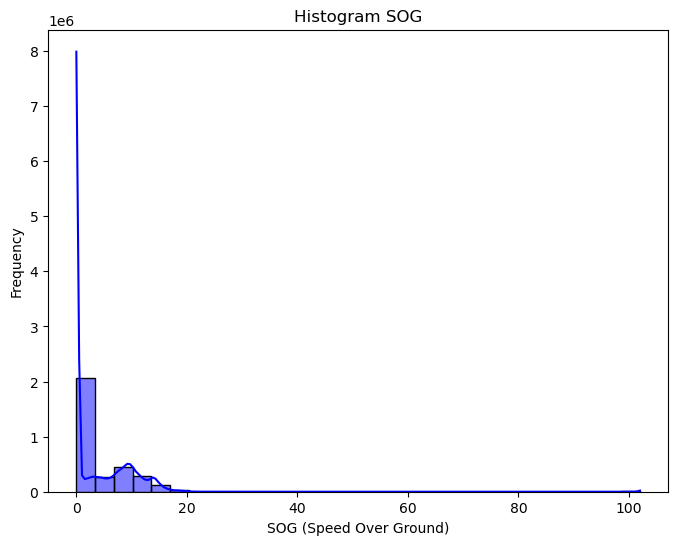

In [9]:
# Memilih kolom 'data_sog'
sog_data = filtered_data1['data_sog']

# Membuat Histogram untuk SOG
plt.figure(figsize=(8, 6))
sns.histplot(sog_data, kde=True, bins=30, color='blue')
plt.title("Histogram SOG")
plt.xlabel("SOG (Speed Over Ground)")
plt.ylabel("Frequency")
plt.show()

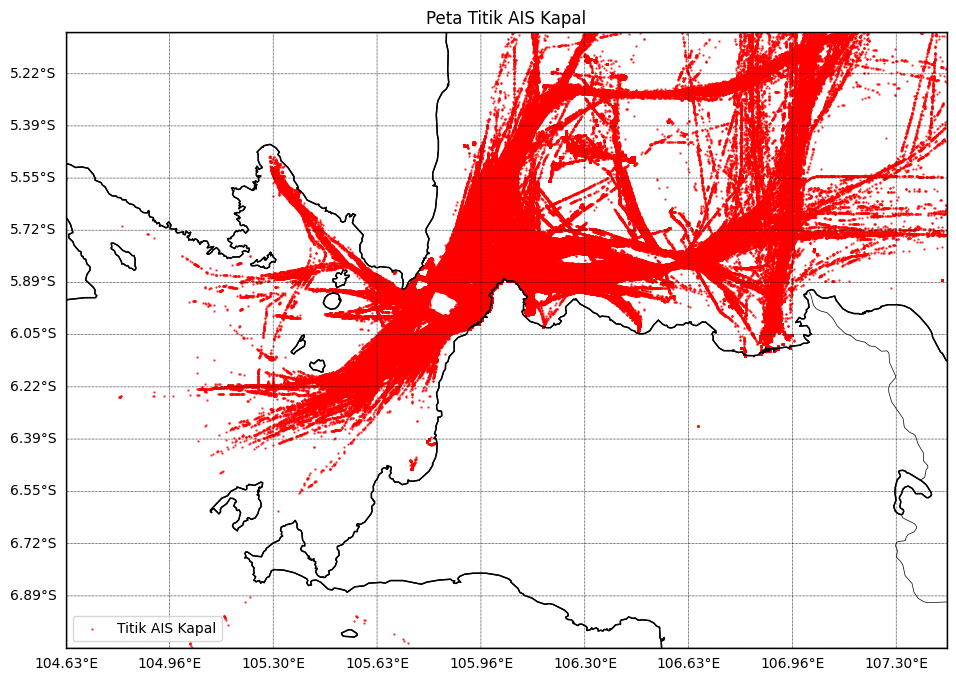

In [16]:
# Mengambil batas minimum dan maksimum latitude dan longitude dari data AIS
lat_min = filtered_data1['data_lat'].min()
lat_max = filtered_data1['data_lat'].max()
lon_min = filtered_data1['data_lon'].min()
lon_max = filtered_data1['data_lon'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Mengambil koordinat garis tepi pantai dari peta yang ditampilkan
coastline_latlon = m.drawcoastlines().get_segments()

# Plot titik-titik awal kapal pada peta
m.scatter(
    filtered_data1['data_lon'], 
    filtered_data1['data_lat'], 
    latlon=True, 
    s=0.5, 
    c='red', 
    marker='o', 
    alpha=0.7, 
    label='Titik AIS Kapal'
)

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()

# Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
parallels = np.arange(lat_min, lat_max, 1/6)
# Menambahkan grid dengan interval 1/3° pada garis vertikal
meridians = np.arange(lon_min, lon_max, 1/3)

m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

# Menambahkan legenda
plt.legend(loc='best')

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "asli_semua_data.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Kapal')
plt.show()


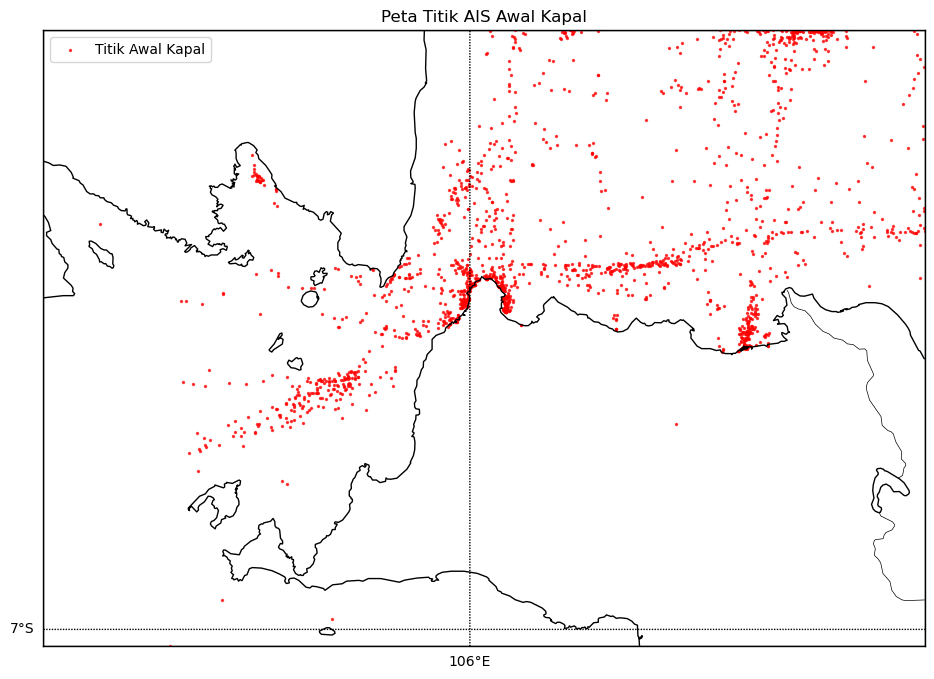

In [11]:
# Mengambil batas minimum dan maksimum latitude dan longitude dari data AIS
lat_min = filtered_data1['data_lat'].min()
lat_max = filtered_data1['data_lat'].max()
lon_min = filtered_data1['data_lon'].min()
lon_max = filtered_data1['data_lon'].max()

# Mengambil titik-titik awal kapal berdasarkan msg_mmsi
start_points = filtered_data1.groupby('msg_mmsi').first().reset_index()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Plot titik-titik awal kapal pada peta
m.scatter(
    start_points['data_lon'], 
    start_points['data_lat'], 
    latlon=True, 
    s=2, 
    c='red', 
    marker='o', 
    alpha=0.7, 
    label='Titik Awal Kapal'
)

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()
m.drawparallels(range(int(lat_min), int(lat_max) + 2, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(int(lon_min), int(lon_max) + 2, 2), labels=[0, 0, 0, 1])

# Menambahkan legenda
plt.legend(loc='best')


# Menyimpan visualisasi dalam file gambar HD
plt.savefig('asli_titik_awal.png', dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Awal Kapal')
plt.show()